In [42]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHES = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\HIRUSHA\\Desktop\\PYTHON\\Potato_Disease_Classification\\dataset\\PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

Why 68 ?
Batch size = 32
32\*68 = 2176


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 2 2 0 1 1 1 1 0 2 1 0 2 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1]


The image_batch is a tensor of the shape (32, 256, 256, 3). This is a batch of 32 images of shape 256x256x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

You can call .numpy() on either of these tensors to convert them to a numpy.ndarray.

0,1,2 -> there are three classes.


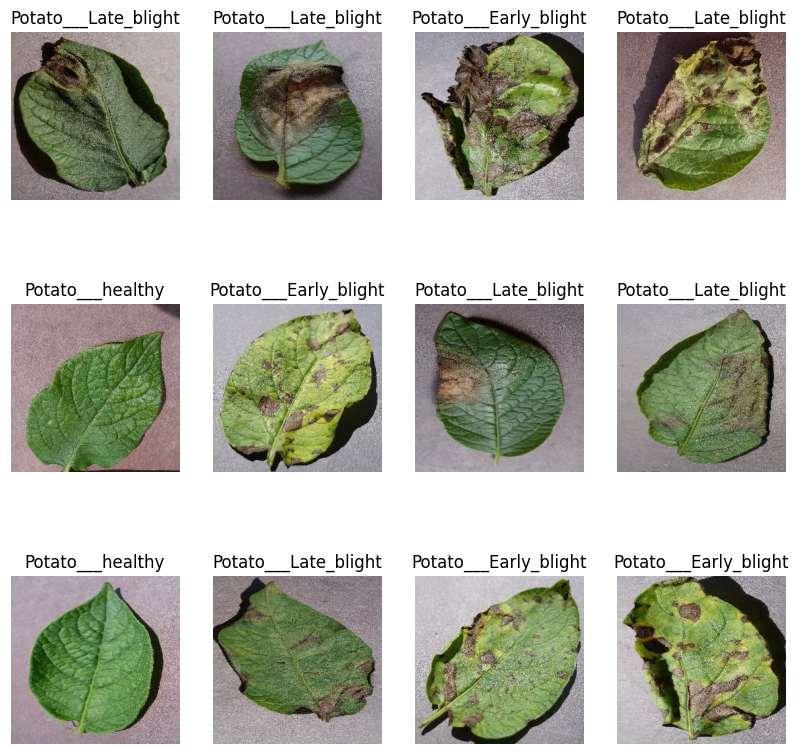

In [8]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

- 80% => Training
- 20% => 10% validation, 10% test


In [9]:
def get_dataset_partitiond_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)  # seed is like random number

    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitiond_tf(dataset)

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_ds,
    epochs=EPOCHES,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 255s 5s/step - loss: 0.6497 - accuracy: 0.7101 - val_loss: 0.6357 - val_accuracy: 0.8646
Epoch 2/50
54/54 [==============================] - 270s 5s/step - loss: 0.4310 - accuracy: 0.8420 - val_loss: 0.7406 - val_accuracy: 0.7240
Epoch 3/50
54/54 [==============================] - 273s 5s/step - loss: 0.2609 - accuracy: 0.8976 - val_loss: 0.2314 - val_accuracy: 0.9010
Epoch 4/50
54/54 [==============================] - 278s 5s/step - loss: 0.2361 - accuracy: 0.9126 - val_loss: 0.3084 - val_accuracy: 0.8542
Epoch 5/50
54/54 [==============================] - 294s 5s/step - loss: 0.2010 - accuracy: 0.9230 - val_loss: 0.1093 - val_accuracy: 0.9531
Epoch 6/50
54/54 [==============================] - 265s 5s/step - loss: 0.1678 - accuracy: 0.9323 - val_loss: 0.1479 - val_accuracy: 0.9479
Epoch 7/50
54/54 [==============================] - 257s 5s/step - loss: 0.1719 - accuracy: 0.9375 - val_loss: 0.0921 - val_accuracy: 0.9635
Epoch 8/50
54

In [18]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 9s 535ms/step - loss: 0.0598 - accuracy: 0.9727


In [19]:
scores

[0.05982379615306854, 0.97265625]

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training validation loss')

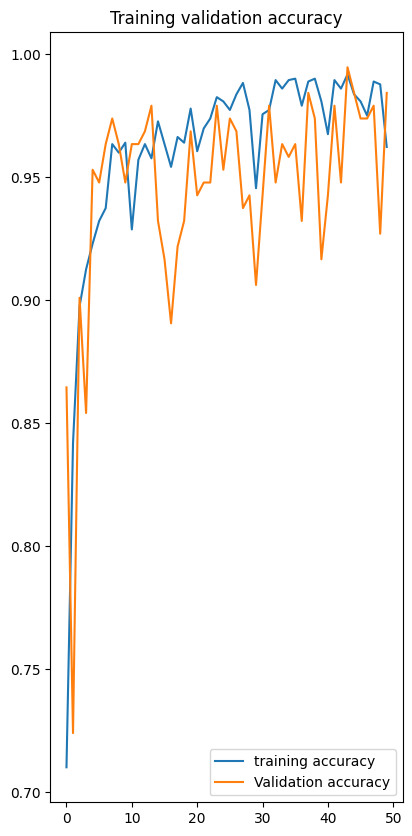

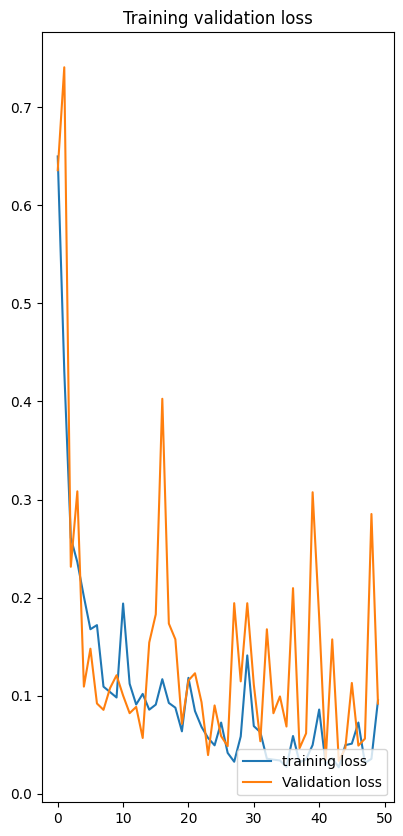

In [43]:

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHES), acc, label='training accuracy')
plt.plot(range(EPOCHES), val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training validation accuracy')

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHES), loss, label='training loss')
plt.plot(range(EPOCHES), val_loss, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training validation loss')

Run Predictions on a sample images


first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


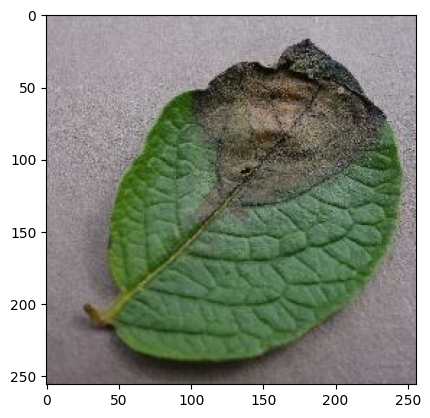

In [38]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

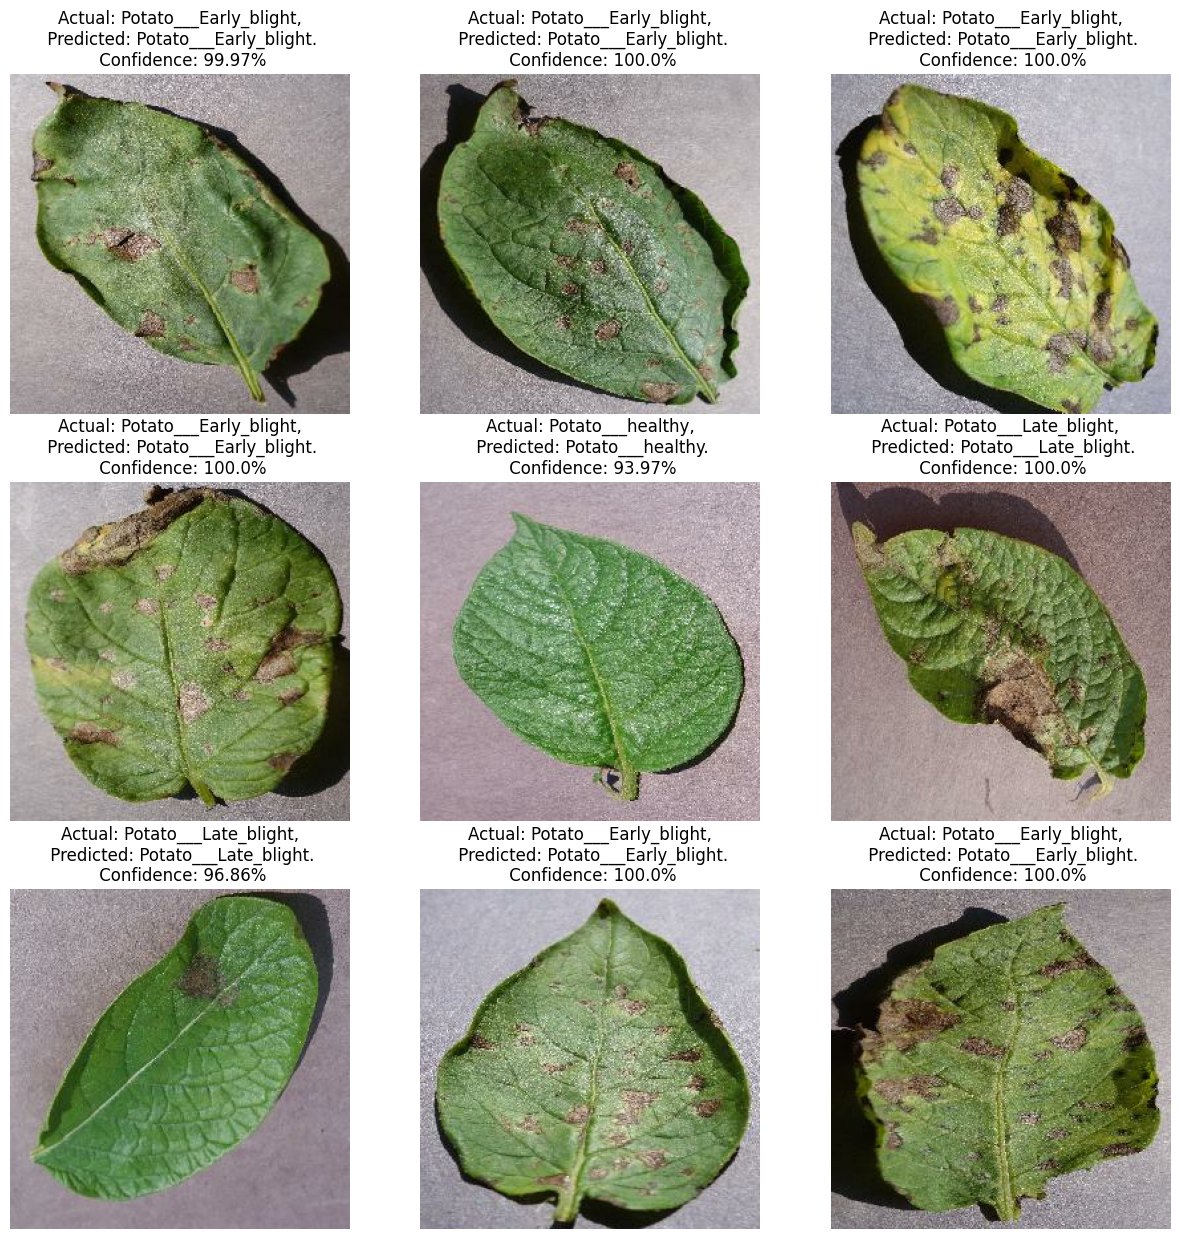

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Saving the Model


In [45]:
model_version = 1
model.save(f"../Model/{model_version}")

INFO:tensorflow:Assets written to: ../Model/1\assets
